In [1]:
require './moromoro'

true

In [2]:
a_2 = <<DATA.to_df
I_H[mA], V_H[mV]
0, 0,
1, 0.967
2, 1.979
3, 2.854
4, 3.816
5, 4.784
6, 5.765
7, 6.763
8, 7.802
9, 8.864
10, 9.972
DATA
a_2.map{ |row| row.merge('V_H[mV]' => "%.1f" % row['V_H[mV]'].round(1)) }.save_csv('csv/jikken_a_2.csv')
nil

In [3]:
a_3 = <<DATA.to_df
I_H[mA], V_H[mV]
0, 0
1, 4.096
2, 8.054
3, 12.710
4, 15.949
5, 19.857
6, 23.741
7, 27.594
8, 31.406
9, 35.157
10, 38.857
DATA
a_3.map{ |row| row.merge('V_H[mV]' => "%.1f" % row['V_H[mV]'].round(1)) }.save_csv('csv/jikken_a_3.csv')
nil

In [4]:
a_4 = <<DATA.to_df
I_{mag}[A], V_H[mV]
0.0, 0.0
0.1, 4.501
0.2, 9.382
0.3, 14.257
0.4, 18.882
0.5, 24.019
0.6, 28.621
0.7, 33.497
0.8, 38.357
0.9, 43.245
1.0, 48.103
DATA
a_4.map{ |row| row.merge('V_H[mV]' => "%.1f" % row['V_H[mV]'].round(1)) }.save_csv('csv/jikken_a_4.csv')
nil

In [5]:
jikken_b_1 = <<DATA.to_df
x[m], V_H[mV]
0   , 48.181
0.010, 48.064
0.020, 47.871
0.030, 47.605
0.040, 47.401
0.050, 47.242
0.060, 47.102
0.070, 46.702
0.080, 46.612
0.090, 46.172
0.100, 45.651
0.105, 45.153
0.110, 44.489
0.115, 43.653
0.120, 42.527
0.125, 41.123
0.130, 39.102
0.135, 36.342
0.140, 32.784
0.145, 28.525
0.150, 23.331
0.155, 18.245
0.160, 14.124
0.165, 10.892
0.170, 8.687
0.175, 6.891
0.180, 5.655
0.185, 4.682
0.190, 3.973
0.195, 3.374
0.200, 2.947
0.210, 2.091
0.220, 1.642
0.230, 1.341
0.240, 1.142
0.250, 0.973
0.260, 0.851
0.270, 0.751
0.280, 0.682
0.290, 0.637
0.300, 0.594
0.310, 0.546
0.320, 0.517
0.330, 0.493
0.340, 0.474
0.350, 0.465
0.360, 0.447
0.370, 0.422
0.380, 0.413
0.390, 0.413
0.400, 0.404
DATA
jikken_b_1.map{ |row| row.merge('x[m]' => "%.3f" % row['x[m]']) }.save_csv('csv/jikken_b_1.csv')

"csv/jikken_b_1.csv"

In [6]:
jikken_b_2 = <<DATA.to_df
y[m], V_H[mV]
0,    -0.113
0.01, -0.137
0.02, -0.167
0.04, -0.223
0.06, -0.307
0.08, -0.427
0.10, -0.604
0.11, -0.730
0.12, -0.923
0.13, -1.159
0.14, -1.453
0.15, -1.901
0.16, -2.465
0.17, -3.072
0.18, -3.454
0.19, -3.092
0.195, -2.542
0.200, -1.950
0.205, -1.003
0.210, -0.125
0.215, 0.821
0.220, 1.694
0.225, 2.443
0.230, 3.030
0.235, 3.389
0.24, 3.464
0.25, 3.192
0.26, 2.619
0.27, 2.063
0.28, 1.637
0.29, 1.301
0.30, 1.062
0.31, 0.885
0.32, 0.754
0.34, 0.572
0.36, 0.446
0.38, 0.373
0.40, 0.310
DATA
jikken_b_2.map{ |row| row.merge('y[m]' => "%.3f" % row['y[m]']) }.save_csv('csv/jikken_b_2.csv')

"csv/jikken_b_2.csv"

# 実験データ

## 実験(a)

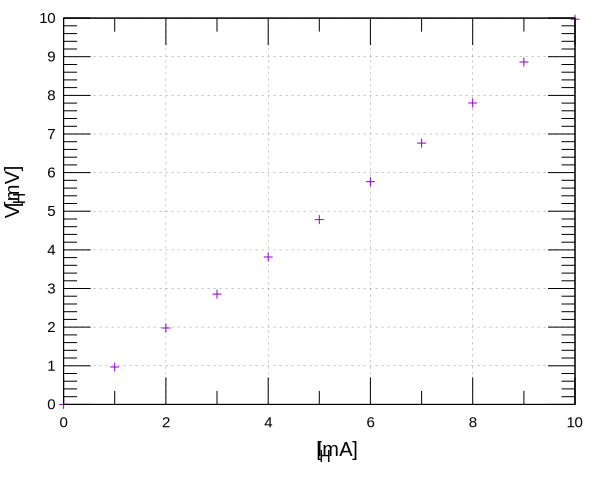

In [7]:
a_2.plot(
  targets: [{ x: 'I_H[mA]', y: 'V_H[mV]' }],
  options: {
    xl: 'I_H[mA]',
    yl: 'V_H[mV]'
  },
  file: 'graph/jikken_a_2.png'
)

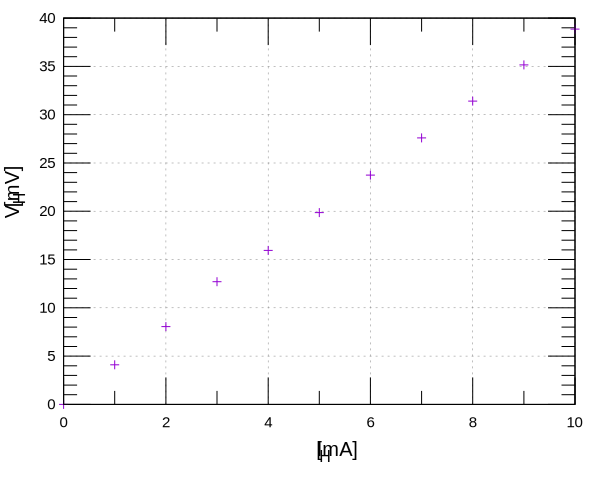

In [8]:
a_3.plot(
  targets: [{ x: 'I_H[mA]', y: 'V_H[mV]' }],
  options: {
    xl: 'I_H[mA]',
    yl: 'V_H[mV]'
  },
  file: 'graph/jikken_a_3.png'
)

In [9]:
a_4_with_h = a_4.map { |row| row.merge('H[A/m]' => row['I_{mag}[A]'] * 20000.0) }.to_a.to_df
a_4_with_h.slope(x: 'V_H[mV]', y: 'H[A/m]')

414.5756505935926

In [10]:
a_4_with_h.segment(x: 'V_H[mV]', y: 'H[A/m]')

92.99874385144358

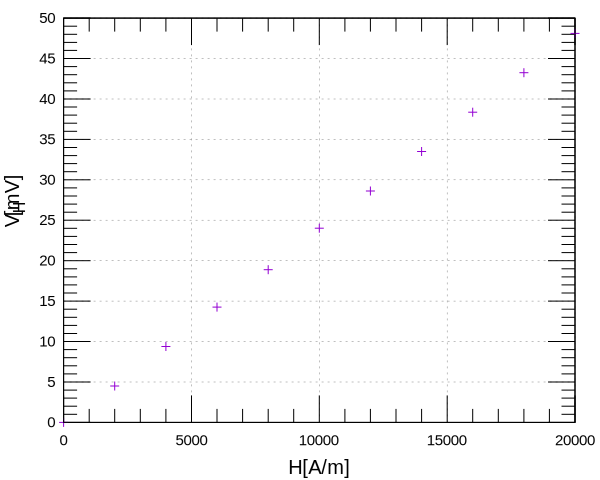

In [11]:
# mV to H
def convert_vh_to_h(vh)
  414.5756505935926 * vh
end

a_4_with_h.plot(
  targets: [{ x: 'H[A/m]', y: 'V_H[mV]' }],
  options: {
    xl: 'H[A/m]',
    yl: 'V_H[mV]'
  },
  file: 'graph/jikken_a_4.png'
)

## 実験(b)

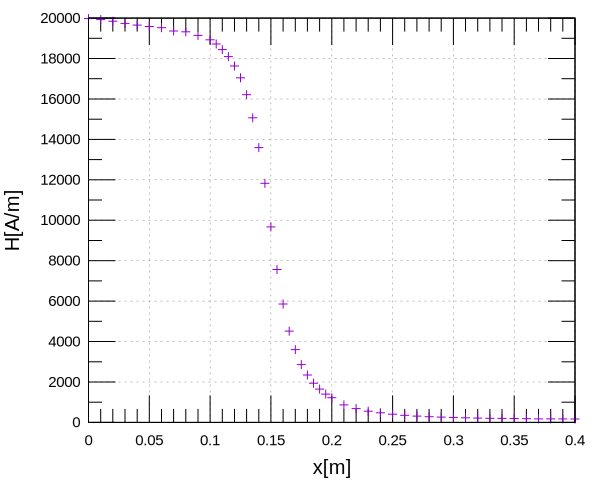

In [12]:
jikken_b_1.map{ |row| row.merge('h[A/m]' => (convert_vh_to_h(row['V_H[mV]']))) }.to_a.to_df.plot(
  targets: [{ x: 'x[m]', y: 'h[A/m]', title: '磁場' }],
  options: {
    xl: 'x[m]',
    yl: 'H[A/m]'
  },
  file: 'graph/jikken_b_1.png'
)

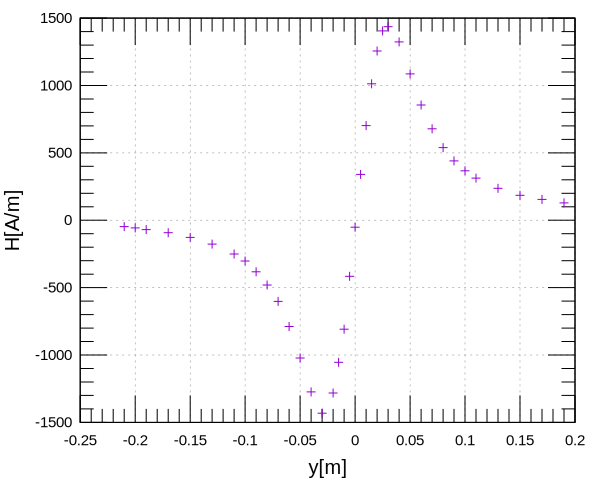

In [13]:
b_2_with_offset = jikken_b_2.map { |row| row.merge('y[m]' => row['y[m]'] - 0.21) }
b_2_with_offset.map{ |row| row.merge('h[A/m]' => convert_vh_to_h(row['V_H[mV]'])) }.to_a.to_df.plot(
  targets: [{ x: 'y[m]', y: 'h[A/m]', title: '磁場' }],
  options: {
    xl: 'y[m]',
    yl: 'H[A/m]'
  },
  file: 'graph/jikken_b_2.png'
)

# 検討

## 磁場の変化を見る

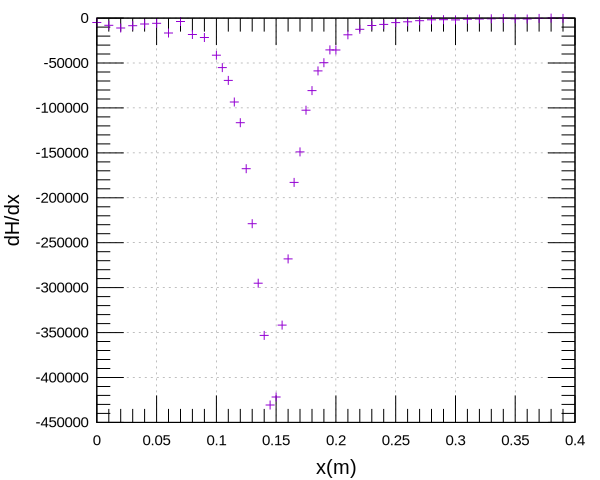

In [14]:
b_1 = jikken_b_1
b_1_with_differential = b_1.to_a.zip(b_1.to_a.drop(1))[0...-1].map do |current_row, next_row|
  differential = (convert_vh_to_h(next_row['V_H[mV]']) - convert_vh_to_h(current_row['V_H[mV]']))/(next_row['x[m]'] - current_row['x[m]'])
  current_row.merge('differential' => differential)
end.to_df

b_1_with_differential.plot(
  targets: [{x: 'x[m]', y: 'differential', title: 'dH/dx'}],
  options: {
    xl: 'x(m)',
    yl: 'dH/dx'
  },
  file: 'graph/jikken_b_1_differential.png'
)

$$
0.07 \lt x \lt 0.15 (m)
$$
において$H$は変化している

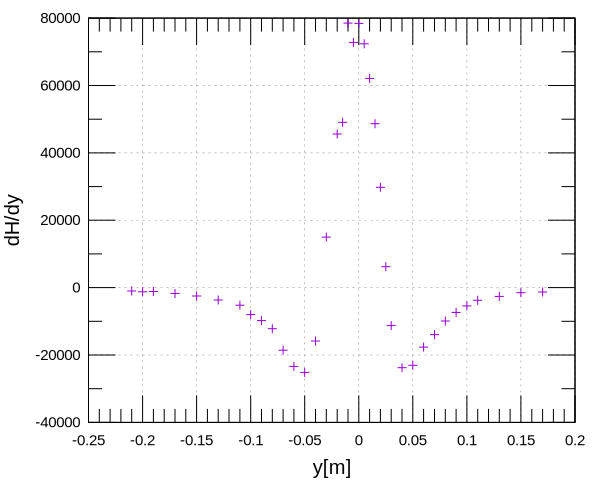

In [15]:
b_2_with_differential = b_2_with_offset.to_a.zip(b_2_with_offset.to_a.drop(1))[0...-1].map do |current_row, next_row|
  differential = (convert_vh_to_h(next_row['V_H[mV]']) - convert_vh_to_h(current_row['V_H[mV]']))/(next_row['y[m]'] - current_row['y[m]'])
  current_row.merge('differential' => differential)
end.to_df

b_2_with_differential.plot(
  targets: [{x: 'y[m]', y: 'differential', title: 'dH/dy'}],
  options: {
    xl: 'y[m]',
    yl: 'dH/dy'
  },
  file: 'graph/jikken_b_2_differential.png'
)

$$
-0.15 \lt y \lt 0.15 (m)
$$
において$H$は変化している

In [48]:
# dH/dx
#0.145, 28.525
#0.150, 23.331

dh_dx = (p(convert_vh_to_h(23.331)) - p(convert_vh_to_h(28.525))) / (0.150 - 0.145)

9672.46450399911
11825.77043318223


-430661.18583662354

In [49]:
# dH/dy
# 0.210, -0.125
# 0.215, 0.821

dh_dy = (p(convert_vh_to_h(0.821)) - p(convert_vh_to_h(- 0.125)))/(0.215 - 0.210)

340.36660913733954
-51.82195632419908


78437.71309230765

In [57]:
div_h = dh_dy * 2 + dh_dx

-273785.75965200824

In [64]:
dh_dy_at_y_0 = b_2_with_differential.find { |row| row['y[m]'] == 0.0 }['differential']
b_1_with_div = b_1_with_differential.map { |row| row.merge('divH' => row['differential'] + 2 * dh_dy_at_y_0) }.to_a.to_df
b_1_with_div.first(5).to_df

x[m],V_H[mV],differential,divH
0.0,48.181,-4850.535111944919,152024.89107267038
0.01,48.064,-8001.310056455986,148874.1161281593
0.02,47.871,-11027.71230578983,145847.71387882545
0.03,47.605,-8457.343272109209,148418.0829125061
0.04,47.401,-6591.752844438451,150283.67334017684


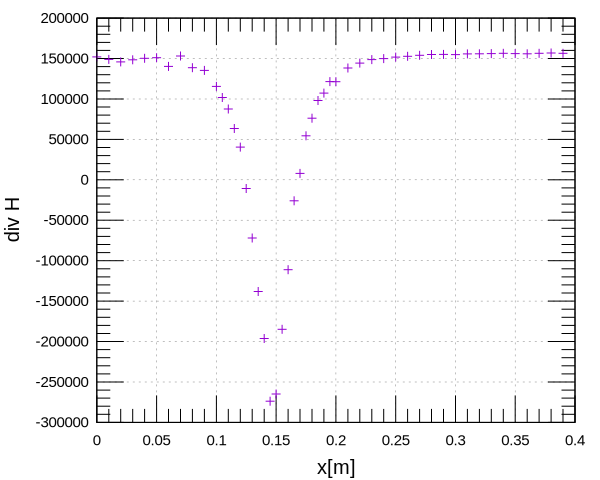

In [66]:
b_1_with_div.plot(
  targets: [{x: 'x[m]', y: 'divH'}],
  options: {
    xl: 'x[m]',
    yl: 'div H'
  },
  file: 'graph/x_divH.png'
)

In [17]:
#require 'math'
a = 0.3/(Math::PI*6000*2)

7.957747154594767e-06

In [18]:
def h_by_x(x)
  n = 20000.0
  i = 1.0
  l = 0.15
  a = 0.025 #適当
  n*i/2.0*((x+l)/Math.sqrt(a**2+(x+l)**2) - (x-l)/(Math.sqrt(a**2+(x-l)**2)))
end

:h_by_x

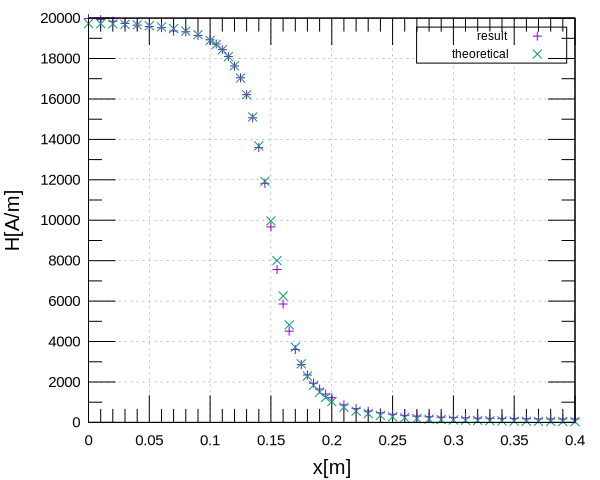

In [19]:
hoge = jikken_b_1.map do |row|
  row.merge(
    'h_by_calc' => h_by_x(row['x[m]']),
    'h_by_jikken' => convert_vh_to_h(row['V_H[mV]']),
  )
end.to_df
hoge.plot(
  targets: [{x: 'x[m]', y: 'h_by_jikken', title: 'result'}, {x: 'x[m]', y: 'h_by_calc', title: 'theoretical'}],
  options: {
    xl: 'x[m]',
    yl: 'H[A/m]',
    key: 'box'
  },
  file: 'graph/jikken_b_1_theoretical_comparizon.png'
)

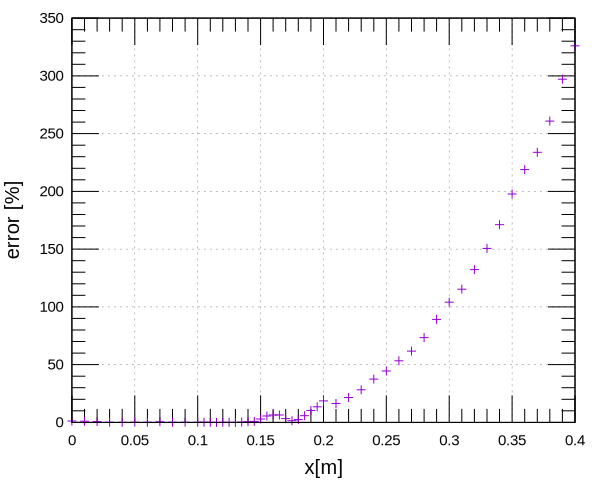

In [20]:
gosa_df = hoge.map do |row|
  zettai_gosa = (row['h_by_calc'] - row['h_by_jikken']).abs
  soutai_gosa = zettai_gosa / row['h_by_calc'] * 100.0
  row.merge('soutai_gosa' => soutai_gosa, 'zettai_gosa' => zettai_gosa)
end.to_a.to_df
gosa_df.plot(
  targets: [{x: 'x[m]', y: 'soutai_gosa'}],
  options: {
    xl: 'x[m]',
    yl: 'error [%]'
  },
  file: 'graph/jikken_b_1_relative_error.png'
)

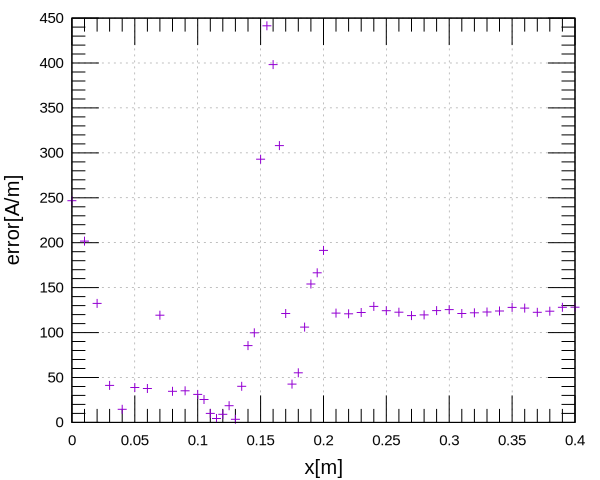

In [21]:
gosa_df.plot(
  targets: [{x: 'x[m]', y: 'zettai_gosa', title: ''}],
  options: {
    xl: 'x[m]',
    yl: 'error[A/m]'
  },
  file: 'graph/jikken_b_1_absolute_error.png'
)

In [22]:
gosa_effected = gosa_df.select { |row| row['x[m]'] > 0.25 }.map { |row| row['zettai_gosa'] }.to_a
jiba = gosa_effected.inject(:+)/gosa_effected.size

123.94453437927419

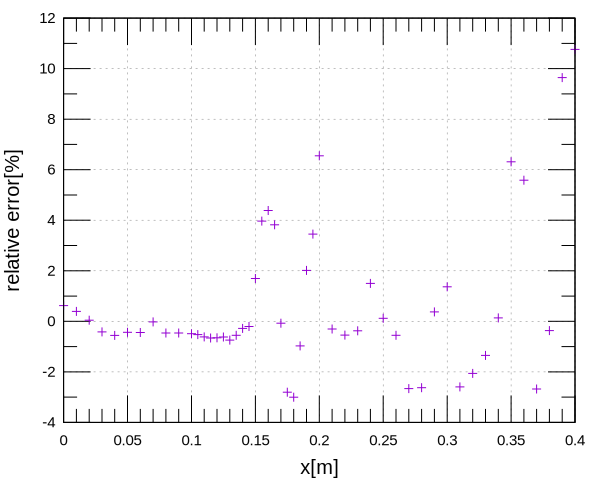

In [23]:
hoge.map do |row|
  zettai_gosa = (row['h_by_calc'] - row['h_by_jikken']).abs - jiba
  soutai_gosa = zettai_gosa / row['h_by_calc'] * 100.0
  row.merge('soutai_gosa' => soutai_gosa, 'zettai_gosa' => zettai_gosa)
end.to_a.to_df.plot(
  targets: [{x: 'x[m]', y: 'soutai_gosa', title: ''}],
  options: {
    xl: 'x[m]',
    yl: 'relative error[%]'
  },
  file: 'graph/jikken_b_1_relative_error_with_offset.png'
)

In [24]:
b_1_with_h = jikken_b_1.map{ |row| row.merge('H[A/m]' => (convert_vh_to_h(row['V_H[mV]']))) }.to_a.to_df
b_1_with_h.first(5).to_df

x[m],V_H[mV],H[A/m]
0.0,48.181,19974.669421249884
0.01,48.064,19926.164070130435
0.02,47.871,19846.150969565875
0.03,47.605,19735.873846507977
0.04,47.401,19651.300413786885


In [37]:
b_1_with_h.integral(x: 'x[m]', y: 'H[A/m]')

3014.719507499499

In [26]:
((b_1_with_h.integral(x: 'x[m]', y: 'H[A/m]') * 2) - 6000)/6000

0.004906502499832944

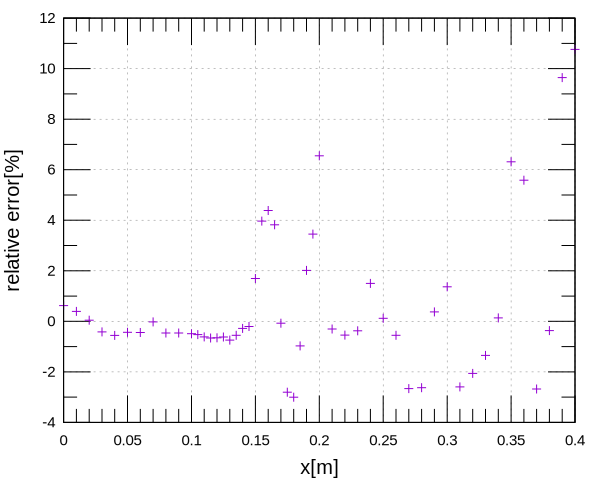

In [34]:
hoge.map do |row|
  zettai_gosa = (row['h_by_calc'] - row['h_by_jikken']).abs - jiba
  soutai_gosa = zettai_gosa / row['h_by_calc'] * 100.0
  row.merge('soutai_gosa' => soutai_gosa, 'zettai_gosa' => zettai_gosa)
end.to_a.to_df.plot(
  targets: [{x: 'x[m]', y: 'soutai_gosa', title: ''}],
  options: {
    xl: 'x[m]',
    yl: 'relative error[%]'
  },
  file: 'graph/jikken_b_1_relative_error_with_offset.png'
)